In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
import seaborn

#### Import Data

In [2]:
# load dataset
data = pd.read_excel("C:/Users/A228744/Documents/Kaggle/Data/Telco-Customer-Churn.xlsx",sheet_name ='WA_Fn-UseC_-Telco-Customer-Chur')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data['TotalCharges'] = np.where(data['TotalCharges'] == ' ',np.nan,data['TotalCharges'])
data['TotalCharges'] = data['TotalCharges'].astype(float)

We will analyse the dataset to identify:

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: SalePrice

#### High Level Exploratory Data Analysis

In [67]:
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,3
Categorical,16
Boolean,1
Date,0
Text (Unique),1
Rejected,0


#### Relationship between churn and categorical variables

In [80]:
data['Churn'] = np.where(data['Churn'] == 'Yes',1,0)

In [81]:
cat_vars = [var for var in data.columns if (data[var].dtypes == 'O') ]

In [82]:
for var in cat_vars[1:]:
    print(var, len(data[var].unique()), ' categories')

gender 2  categories
Partner 2  categories
Dependents 2  categories
PhoneService 2  categories
MultipleLines 3  categories
InternetService 3  categories
OnlineSecurity 3  categories
OnlineBackup 3  categories
DeviceProtection 3  categories
TechSupport 3  categories
StreamingTV 3  categories
StreamingMovies 3  categories
Contract 3  categories
PaperlessBilling 2  categories
PaymentMethod 4  categories


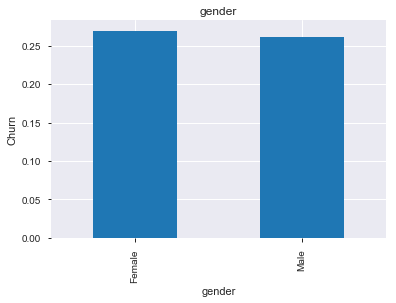

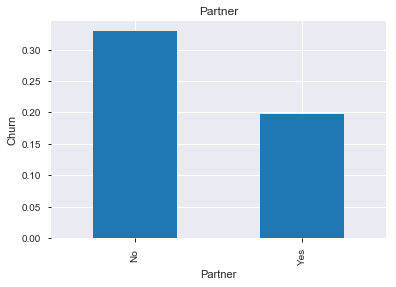

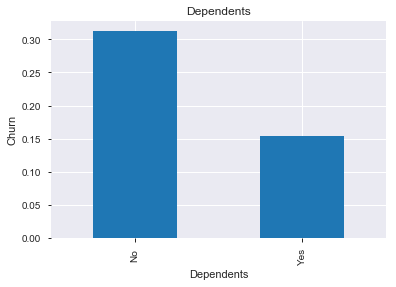

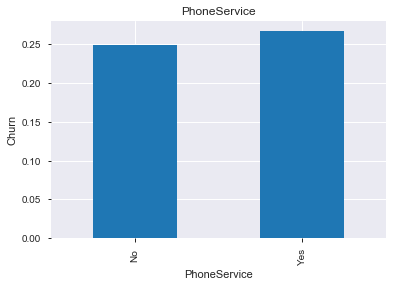

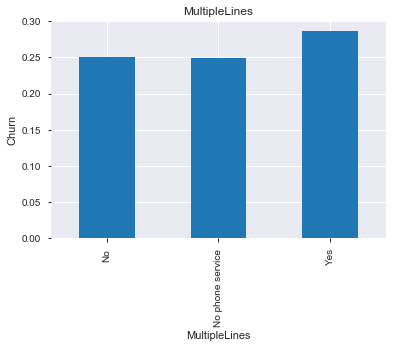

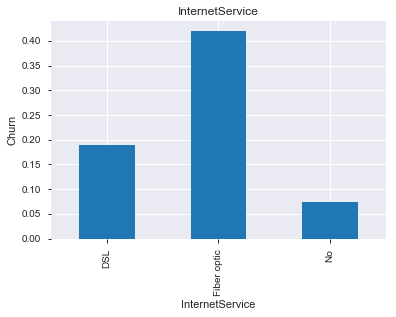

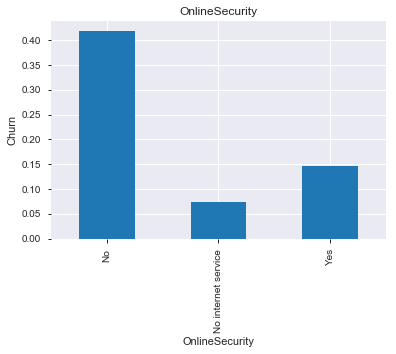

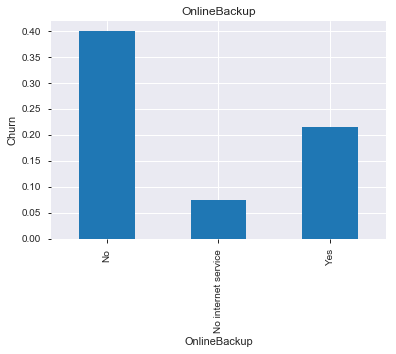

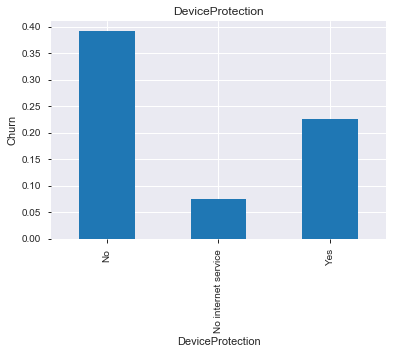

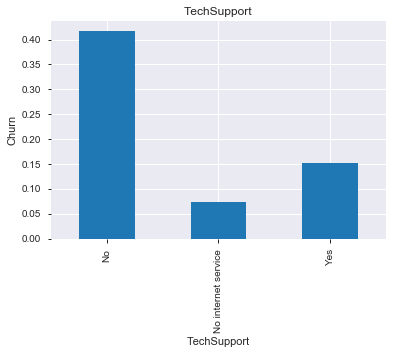

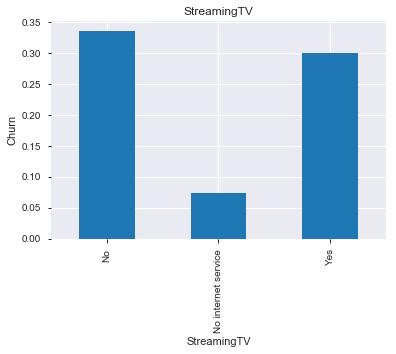

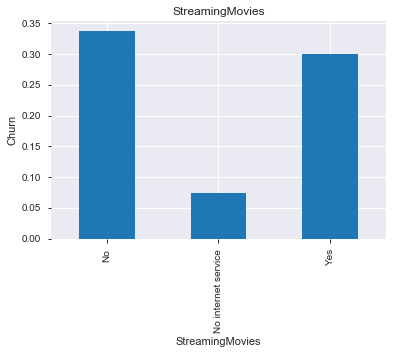

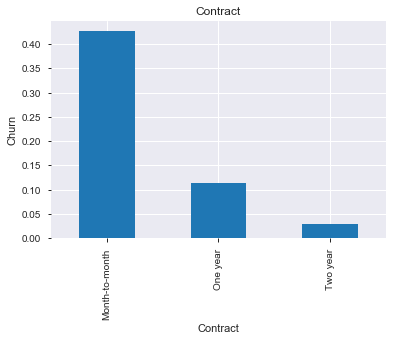

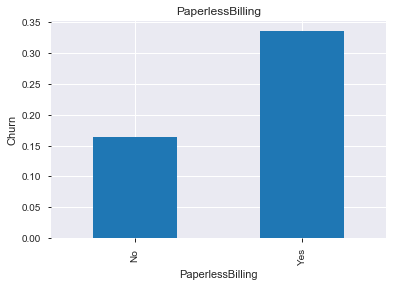

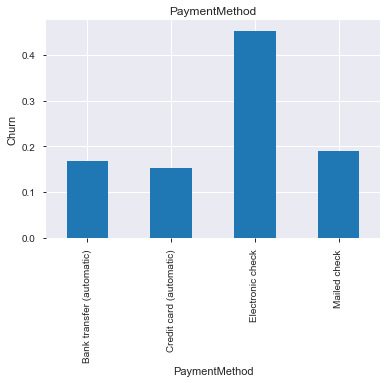

In [86]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    ((df.groupby(var)['Churn'].sum())/(df.groupby(var)['Churn'].count())).plot.bar()
    plt.title(var)
    plt.ylabel('Churn')
    plt.show()
    
for var in cat_vars[1:]:
    analyse_vars(data, var)

#### Relationship between churn and numerical variables

In [70]:
num_vars = [var for var in data.columns if var not in cat_vars + ['Churn'] + ['SeniorCitizen']]

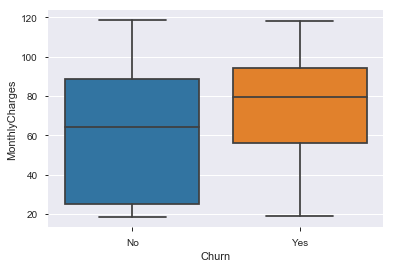

In [77]:
seaborn.boxplot(data['Churn'],data['MonthlyCharges'])    

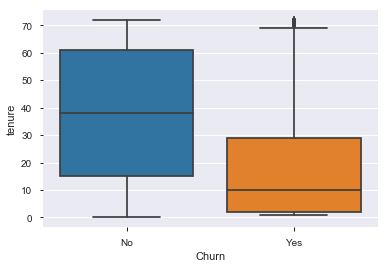

In [76]:
seaborn.boxplot(data['Churn'],data['tenure'])    

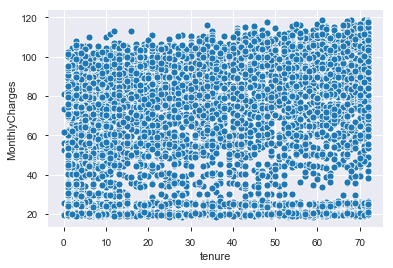

In [89]:
seaborn.scatterplot(data['tenure'],data['MonthlyCharges'])

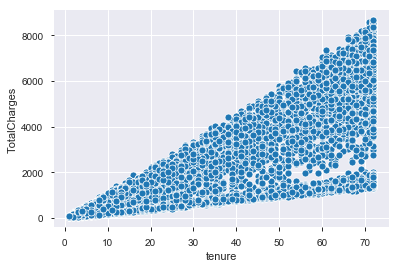

In [90]:
seaborn.scatterplot(data['tenure'],data['TotalCharges'])

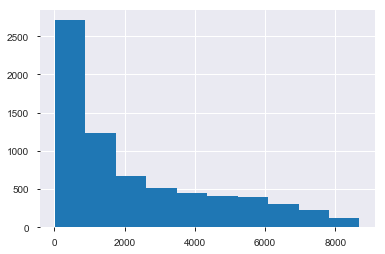

In [94]:
data['TotalCharges'].hist()

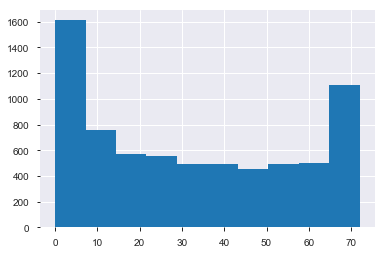

In [96]:
data['tenure'].hist()

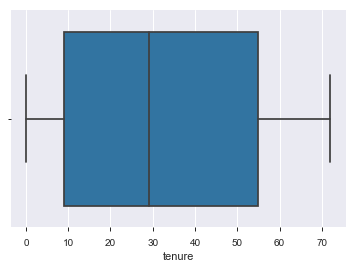

In [100]:
seaborn.boxplot(data['tenure'])  

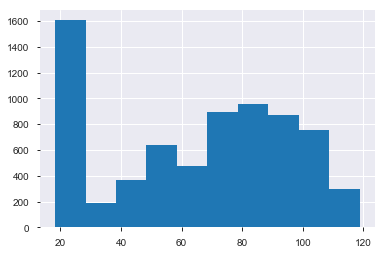

In [95]:
data['MonthlyCharges'].hist()

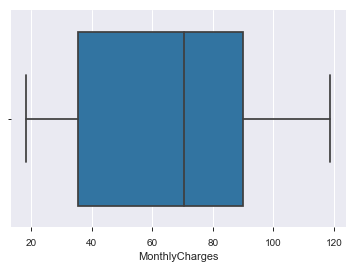

In [98]:
seaborn.boxplot(data['MonthlyCharges'])  

#### Removing highly correlated variables

In [105]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [107]:
list(data)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'Churn']